In [1]:
import numpy as np

In [2]:
from NeuronalNetwork import NeuralLayer, NeuralNetwork
from LossFunc import binary_crossentropy_derivative, binary_crossentropy
from ActivFunc import relu, relu_derivative, softmax, softmax_derivative
from Optimizer import SGD
import Datasets
from MetricUtils import display_loss_per_epoch, accuracy, confusionMatrix

In [3]:
def build_neural_network(X_train, y_train):
    # Arquitectura de la red neuronal
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    hidden_size1 = 100
    hidden_size2 = 100

    # Creación de capas
    input_layer = NeuralLayer(input_size, hidden_size1, relu, relu_derivative)
    hidden_layer1 = NeuralLayer(hidden_size1, hidden_size2, relu, relu_derivative)
    hidden_layer2 = NeuralLayer(hidden_size2, output_size, softmax, softmax_derivative, use_bias=False)

    # Creación de la red neuronal
    neural_network = NeuralNetwork([input_layer, hidden_layer1, hidden_layer2])
    return neural_network

In [4]:
def train_neural_network(neural_network, X_train, y_train, X_test, y_test, optimizer, epochs=100, batch_size=20, momentum=0.9):
    
    loss_per_epoch = list()
    
    # Entrenamiento
    for epoch in range(epochs):
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices) # reorganiza de manera aleatoria el indice
        

        for i in range(0, X_train.shape[0], batch_size):
            batch_indices = indices[i:i+batch_size]
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]

            # Forward pass
            predicted_output = neural_network.forward(X_batch)

            # Cálculo de la pérdida
            loss = np.mean(binary_crossentropy(y_batch, predicted_output))

            # Backpropagation
            error = binary_crossentropy_derivative(y_batch, predicted_output)
            neural_network.backward(error, optimizer, momentum)

        # Evaluación en el conjunto de prueba
        test_output = neural_network.forward(X_test)
        test_loss = np.mean(binary_crossentropy(y_test, test_output))
        loss_per_epoch.append(test_loss)

        print(f"Epoch {epoch + 1} -  Test Loss: {test_loss:.4f}")
    
    display_loss_per_epoch(loss_per_epoch)


In [5]:
def main():
    # Carga y preprocesamiento de datos
    X_train, y_train, X_test, y_test = Datasets.load_and_preprocess_data_mnist("../data") # añadir direccion de la carpeta con datos MNIST

    #X_train, y_train, X_test, y_test = Datasets.load_and_preprocess_data_iris()

    # Construcción de la red neuronal
    neural_network = build_neural_network(X_train, y_train)

    # Entrenamiento de la red neuronal
    optimizer = SGD(learning_rate=0.01)
    train_neural_network(neural_network, X_train, y_train, X_test, y_test, optimizer, epochs=30, batch_size=150, momentum=0.9)
    
    y_pred = neural_network.forward(X_test)
    
    accuracy(y_test, y_pred)
  
    confusionMatrix(y_test, y_pred)

Epoch 1 -  Test Loss: 0.0455
Epoch 2 -  Test Loss: 0.0363
Epoch 3 -  Test Loss: 0.0302
Epoch 4 -  Test Loss: 0.0252
Epoch 5 -  Test Loss: 0.0234
Epoch 6 -  Test Loss: 0.0219
Epoch 7 -  Test Loss: 0.0197
Epoch 8 -  Test Loss: 0.0185
Epoch 9 -  Test Loss: 0.0171
Epoch 10 -  Test Loss: 0.0164
Epoch 11 -  Test Loss: 0.0171
Epoch 12 -  Test Loss: 0.0154
Epoch 13 -  Test Loss: 0.0155
Epoch 14 -  Test Loss: 0.0147
Epoch 15 -  Test Loss: 0.0137
Epoch 16 -  Test Loss: 0.0139
Epoch 17 -  Test Loss: 0.0138
Epoch 18 -  Test Loss: 0.0137
Epoch 19 -  Test Loss: 0.0137
Epoch 20 -  Test Loss: 0.0131
Epoch 21 -  Test Loss: 0.0132
Epoch 22 -  Test Loss: 0.0134
Epoch 23 -  Test Loss: 0.0141
Epoch 24 -  Test Loss: 0.0132
Epoch 25 -  Test Loss: 0.0132
Epoch 26 -  Test Loss: 0.0131
Epoch 27 -  Test Loss: 0.0136
Epoch 28 -  Test Loss: 0.0137
Epoch 29 -  Test Loss: 0.0130
Epoch 30 -  Test Loss: 0.0133


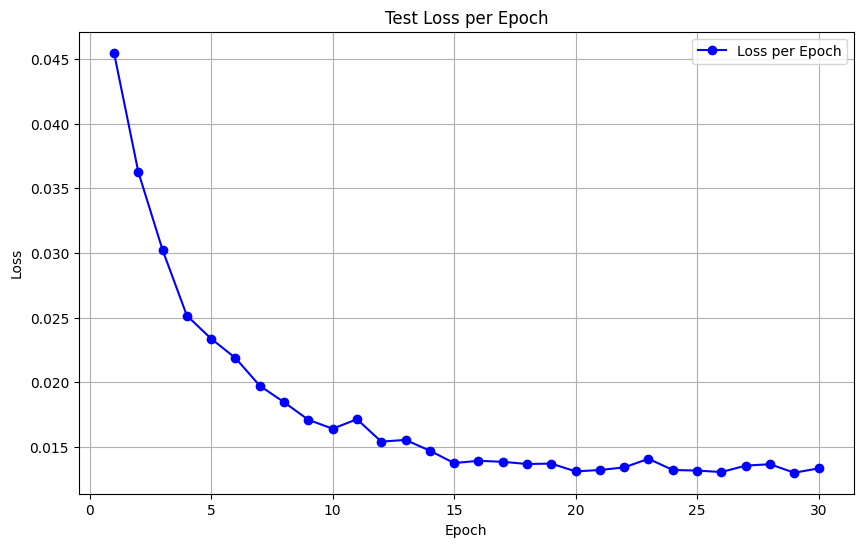

Final Accuracy on Test Set: 97.79%
Confusion Matrix:
[[ 971    0    0    1    2    1    1    1    2    1]
 [   0 1121    2    2    0    1    5    0    3    1]
 [   6    2 1000    6    2    0    4    4    8    0]
 [   0    0    4  982    0   10    0    3    5    6]
 [   1    1    4    1  960    1    3    2    0    9]
 [   2    0    0    3    0  876    5    1    2    3]
 [   2    3    2    1    5    5  939    0    1    0]
 [   1    5    8    2    1    0    0 1002    2    7]
 [   5    0    2    3    3    6    3    2  947    3]
 [   2    2    0    5    7    7    0    2    3  981]]


In [6]:
if __name__ == "__main__":
    main()